# StockX sneaker data

In [3]:
# Stock x is an online marketplace where people can buy and sell sneakers 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel(r'C:\Users\Nicola\Downloads\StockX-Data-Contest-.xlsx')
df

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220,2018-12-26,8.0,Oregon
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220,2018-12-26,8.5,California
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220,2018-12-26,5.5,New York
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220,2018-12-26,11.0,California


# Best selling sneaker


In [6]:
# We can extract and visualize the best performing snneaker by number of sales

In [7]:
df['count'] =1

Best_Sneaker = df.groupby('Sneaker Name').count()['count'].sort_values(ascending=False)

Best_Sneaker

Sneaker Name
adidas-Yeezy-Boost-350-V2-Butter                     11423
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0                10395
Adidas-Yeezy-Boost-350-V2-Zebra                      10110
Adidas-Yeezy-Boost-350-V2-Blue-Tint                   9297
Adidas-Yeezy-Boost-350-V2-Cream-White                 9097
Adidas-Yeezy-Boost-350-V2-Sesame                      5553
adidas-Yeezy-Boost-350-V2-Static                      4983
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow          4854
Air-Jordan-1-Retro-High-Off-White-University-Blue     4635
adidas-Yeezy-Boost-350-V2-Static-Reflective           3184
Nike-Air-Presto-Off-White-Black-2018                  1884
Nike-Air-Presto-Off-White-White-2018                  1883
Nike-Air-VaporMax-Off-White-2018                      1591
Nike-Blazer-Mid-Off-White-All-Hallows-Eve             1435
Nike-Blazer-Mid-Off-White-Grim-Reaper                 1398
Nike-Zoom-Fly-Off-White-Pink                          1359
Nike-Air-VaporMax-Off-White-Black          

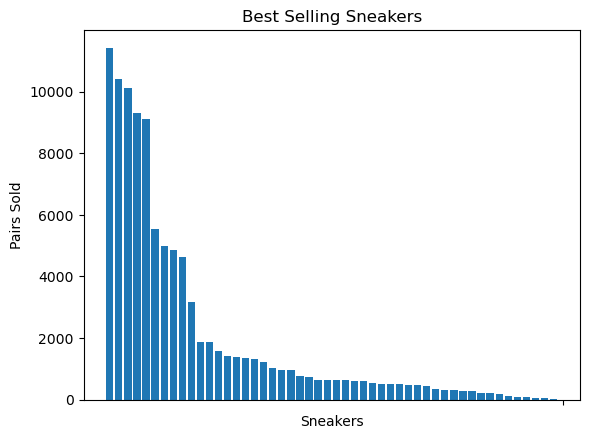

In [8]:
sneakers = sorted([Sneaker for Sneaker,df in df.groupby('Sneaker Name')])

plt.bar(sneakers,Best_Sneaker)

plt.title('Best Selling Sneakers')
plt.xlabel('Sneakers')
plt.ylabel('Pairs Sold')

plt.xticks('')

plt.show()

# Monst money made from a Sneaker


In [9]:
# Usually the website takes a 10% fee of every sneaker sale

In [10]:
df.insert(4,'% off shoe',df['Sale Price']*0.1)

In [11]:
Most_proitable_sneaker_stock_x = df.groupby('Sneaker Name').sum()['% off shoe'].sort_values(ascending=False)
Most_proitable_sneaker_stock_x

Sneaker Name
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0                416257.03289
Air-Jordan-1-Retro-High-Off-White-University-Blue    394370.59863
Adidas-Yeezy-Boost-350-V2-Zebra                      365246.36522
Adidas-Yeezy-Boost-350-V2-Blue-Tint                  352343.40000
adidas-Yeezy-Boost-350-V2-Butter                     308147.52588
Adidas-Yeezy-Boost-350-V2-Cream-White                262638.53290
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow         189590.92696
adidas-Yeezy-Boost-350-V2-Static-Reflective          149057.56806
Adidas-Yeezy-Boost-350-V2-Sesame                     146637.43162
adidas-Yeezy-Boost-350-V2-Static                     143045.24556
Nike-Air-Presto-Off-White-Black-2018                 137620.41752
Air-Jordan-1-Retro-High-Off-White-Chicago            133619.90000
Nike-Air-Presto-Off-White-White-2018                 119455.95226
Nike-Air-VaporMax-Off-White-2018                      94191.10000
Nike-Blazer-Mid-Off-White-All-Hallows-Eve             86986.832

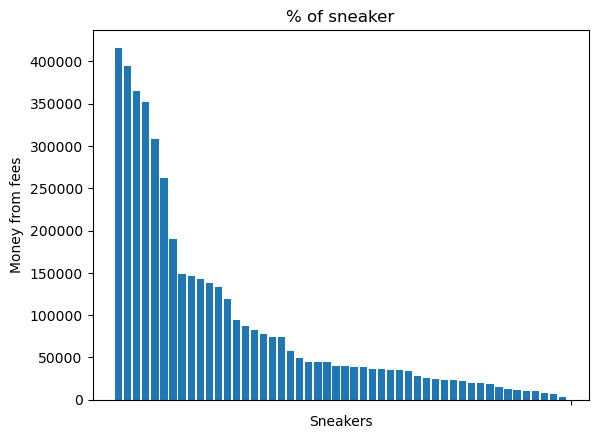

In [12]:
plt.bar(sneakers,Most_proitable_sneaker_stock_x)

plt.title('% of sneaker')
plt.xlabel('Sneakers')
plt.ylabel('Money from fees')

plt.xticks('')

plt.show()

# Whats the correlation?

In [13]:
# Is there any correlation between the most sold sneaker and the most profitable shoe for the website?

In [14]:
Correlation = df.groupby('Sneaker Name').agg({'% off shoe':'sum', 'count':'sum','Sale Price':'mean'}).sort_values(by='% off shoe',ascending=False)

Correlation

,% off shoe,count,Sale Price
Sneaker Name,,,
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,416257.03289,10395,400.439666
Air-Jordan-1-Retro-High-Off-White-University-Blue,394370.59863,4635,850.853503
Adidas-Yeezy-Boost-350-V2-Zebra,365246.36522,10110,361.272369
Adidas-Yeezy-Boost-350-V2-Blue-Tint,352343.40000,9297,378.986125
adidas-Yeezy-Boost-350-V2-Butter,308147.52588,11423,269.760593
Adidas-Yeezy-Boost-350-V2-Cream-White,262638.53290,9097,288.708951
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow,189590.92696,4854,390.586994
adidas-Yeezy-Boost-350-V2-Static-Reflective,149057.56806,3184,468.145628
Adidas-Yeezy-Boost-350-V2-Sesame,146637.43162,5553,264.068849


In [15]:
# We can observe that the most sold shoe is not the most profitable for Stock X

In [16]:
# This is the result of the different  mean prices sneakers can have

In [17]:
Correlation.head(10)

,% off shoe,count,Sale Price
Sneaker Name,,,
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,416257.03289,10395,400.439666
Air-Jordan-1-Retro-High-Off-White-University-Blue,394370.59863,4635,850.853503
Adidas-Yeezy-Boost-350-V2-Zebra,365246.36522,10110,361.272369
Adidas-Yeezy-Boost-350-V2-Blue-Tint,352343.40000,9297,378.986125
adidas-Yeezy-Boost-350-V2-Butter,308147.52588,11423,269.760593
Adidas-Yeezy-Boost-350-V2-Cream-White,262638.53290,9097,288.708951
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow,189590.92696,4854,390.586994
adidas-Yeezy-Boost-350-V2-Static-Reflective,149057.56806,3184,468.145628
Adidas-Yeezy-Boost-350-V2-Sesame,146637.43162,5553,264.068849


In [18]:
round(Correlation['Sale Price'].head(10).mean(),0)

396.0

In [19]:
round(Correlation['count'].head(10).mean(),0)

7353.0

# Coorelation Between the shoe sales and the price?

In [20]:
Correlation_1 = df.groupby('Sneaker Name').agg({'Sale Price':'mean'})
Correlation_1

,Sale Price
Sneaker Name,
Adidas-Yeezy-Boost-350-Low-Moonrock,996.710000
Adidas-Yeezy-Boost-350-Low-Oxford-Tan,1011.514286
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015,895.094737
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016,984.237705
Adidas-Yeezy-Boost-350-Low-Turtledove,1531.661765
Adidas-Yeezy-Boost-350-Low-V2-Beluga,788.704819
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,400.439666
Adidas-Yeezy-Boost-350-V2-Blue-Tint,378.986125
Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,656.631111


In [21]:
Correlation_2 = df.groupby('Sneaker Name').agg({'count':'sum'})
Correlation_2

,count
Sneaker Name,
Adidas-Yeezy-Boost-350-Low-Moonrock,100
Adidas-Yeezy-Boost-350-Low-Oxford-Tan,70
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015,95
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016,122
Adidas-Yeezy-Boost-350-Low-Turtledove,68
Adidas-Yeezy-Boost-350-Low-V2-Beluga,498
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10395
Adidas-Yeezy-Boost-350-V2-Blue-Tint,9297
Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,225


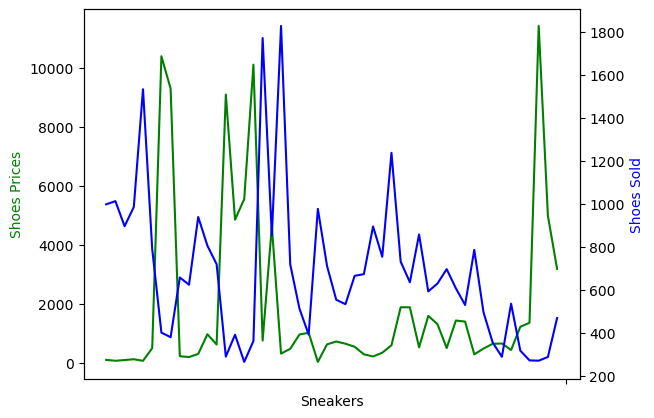

In [37]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(sneakers, Correlation_2, 'g-')
ax2.plot(sneakers, Correlation_1, 'b-')

ax1.set_xlabel('Sneakers')
ax1.set_ylabel('Shoes Prices', color='g')
ax2.set_ylabel('Shoes Sold', color='b')


ax1.set_xticks('')


plt.show()

In [39]:
# Apparently theres a indirectly proportional relation between the price and the number of shoe sold, the factor
# of this correlation can depend from the popularity of the shoe

# Best month for selling sneaker

In [9]:
df['Order Date'].dtype

#df = df.drop(columns=['Month'])

df.insert(1,'Month of the year',df['Order Date'].dt.strftime('%y-%m'))

df



,Order Date,Month of the year,Brand,Sneaker Name,Sale Price,% off shoe,Retail Price,Release Date,Shoe Size,Buyer Region,count
0,2017-09-01,17-09,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,109.7,220,2016-09-24,11.0,California,1
1,2017-09-01,17-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,68.5,220,2016-11-23,11.0,California,1
2,2017-09-01,17-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,69.0,220,2016-11-23,11.0,California,1
3,2017-09-01,17-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,107.5,220,2016-11-23,11.5,Kentucky,1
4,2017-09-01,17-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,82.8,220,2017-02-11,11.0,Rhode Island,1
...,...,...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,19-02,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,56.5,220,2018-12-26,8.0,Oregon,1
99952,2019-02-13,19-02,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,59.8,220,2018-12-26,8.5,California,1
99953,2019-02-13,19-02,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,60.5,220,2018-12-26,5.5,New York,1
99954,2019-02-13,19-02,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,65.0,220,2018-12-26,11.0,California,1


In [10]:
Months_through_the_years = df.groupby('Month of the year').count()['count']
Months_through_the_years

Month of the year
17-09      697
17-10      610
17-11     4644
17-12     7342
18-01     3664
18-02     2428
18-03     2745
18-04     2756
18-05     3456
18-06     5431
18-07     7434
18-08     6090
18-09     3974
18-10     6697
18-11    10845
18-12    14950
19-01    10847
19-02     5346
Name: count, dtype: int64

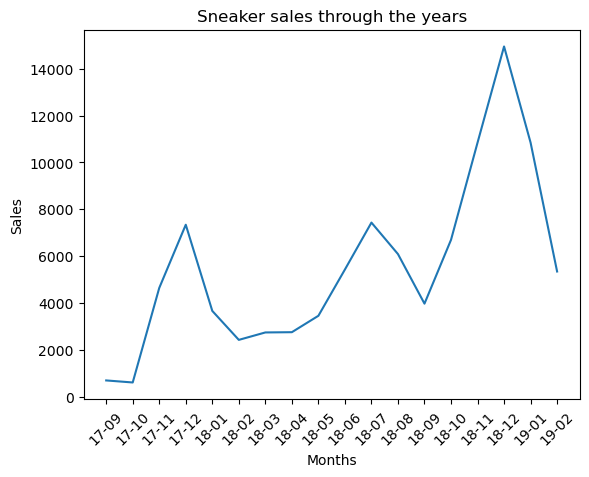

In [11]:
Months = sorted([Month for Month,df in df.groupby('Month of the year')])

plt.plot(Months,Months_through_the_years)

plt.title('Sneaker sales through the years')
plt.xlabel('Months')
plt.ylabel('Sales')

plt.xticks(rotation=45)

plt.show()

# Best Region by number of customers

In [12]:
Region = df.groupby('Buyer Region').count()['count']
Region

Buyer Region
Alabama                   457
Alaska                     61
Arizona                  1398
Arkansas                  173
California              19349
Colorado                  954
Connecticut              1110
Delaware                 1242
District of Columbia      271
Florida                  6376
Georgia                  1846
Hawaii                    383
Idaho                     107
Illinois                 3782
Indiana                  1026
Iowa                      460
Kansas                    340
Kentucky                  488
Louisiana                 537
Maine                     132
Maryland                 1870
Massachusetts            2903
Michigan                 2762
Minnesota                 725
Mississippi               163
Missouri                  660
Montana                    49
Nebraska                  245
Nevada                    790
New Hampshire             241
New Jersey               4720
New Mexico                231
New York                165

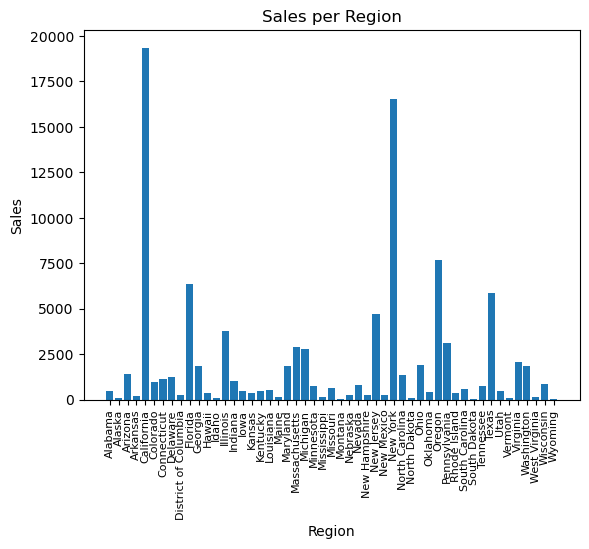

In [13]:
Regions = [Region for Region,df in df.groupby('Buyer Region')]
plt.bar(Regions,Region)

plt.title('Sales per Region')


plt.xlabel('Region')
plt.ylabel('Sales')

plt.xticks(fontsize=8,rotation=90)



plt.show()